In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the data and storing it as a DataFrame

In [4]:
soccer= pd.read_csv('/Users/ayooluwaamole/Documents/Python files/Excel or CSV Files/football_sole.csv')

In [5]:
soccer.head(5)

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
0,Luís Figo,Right Winger,27,FC Barcelona,LaLiga,Real Madrid,LaLiga,2000-2001,NaN,60000000
1,Hernán Crespo,Centre-Forward,25,Parma,Serie A,Lazio,Serie A,2000-2001,NaN,56810000
2,Marc Overmars,Left Winger,27,Arsenal,Premier League,FC Barcelona,LaLiga,2000-2001,NaN,40000000
3,Gabriel Batistuta,Centre-Forward,31,Fiorentina,Serie A,AS Roma,Serie A,2000-2001,NaN,36150000
4,Nicolas Anelka,Centre-Forward,21,Real Madrid,LaLiga,Paris SG,Ligue 1,2000-2001,NaN,34500000


### Exploring the statistical numbers of the int/float features

In [6]:
soccer.describe()

,Age,Market_value,Transfer_fee
count,4700.000000,3.440000e+03,4.700000e+03
mean,24.338723,8.622469e+06,9.447586e+06
std,3.230809,8.795181e+06,1.043772e+07
min,0.000000,5.000000e+04,8.250000e+05
25%,22.000000,3.500000e+06,4.000000e+06
50%,24.000000,6.000000e+06,6.500000e+06
75%,27.000000,1.000000e+07,1.082000e+07
max,35.000000,1.200000e+08,2.220000e+08


In [7]:
soccer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4700 entries, 0 to 4699
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          4700 non-null   object 
 1   Position      4700 non-null   object 
 2   Age           4700 non-null   int64  
 3   Team_from     4700 non-null   object 
 4   League_from   4700 non-null   object 
 5   Team_to       4700 non-null   object 
 6   League_to     4700 non-null   object 
 7   Season        4700 non-null   object 
 8   Market_value  3440 non-null   float64
 9   Transfer_fee  4700 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 367.3+ KB


In [ ]:
##There are a few things we need to correct before we proceed in our analysis
## 1. We have to make Season an integer with just the year
## 2.From the above we can see that someone has an age of 0 which is impossible 
## 3. We'll just convert the transfer field to millions

### Splitting the Season column to show when the player transferred from the club

In [8]:
soccer['Season_transfered'] = soccer['Season'].str.split('-').str[0]
soccer['Season_transfered'] = soccer['Season_transfered'].astype(str).astype(int)

### Removing the row with an Age of zero (Not possible!!)

In [14]:
age_zero_index = soccer.index[soccer['Age']==0].tolist()[0]
soccer = soccer.drop(labels = age_zero_index, axis = 0)


### Converting the Market value and Transfer fields into per millions

In [16]:
soccer['Market_value'] = soccer['Market_value']/1000000
soccer['Transfer_fee'] = soccer['Transfer_fee']/1000000
soccer = soccer.rename(columns ={'Market_value':'Market_value(millions)','Transfer_fee':'Transfer_fee(millions)'})

In [17]:
soccer.dtypes

Name                       object
Position                   object
Age                         int64
Team_from                  object
League_from                object
Team_to                    object
League_to                  object
Season                     object
Market_value(millions)    float64
Transfer_fee(millions)    float64
Season_transfered           int64
dtype: object

### Now we have to make the position column with only 4 distinct values, currently there are about 17

In [18]:
position_frame = soccer['Position'].value_counts().reset_index()
legendary = position_frame['index'].to_list()


In [21]:
for pos in legendary:
    if 'Forward' in pos:
        soccer.loc[soccer['Position']==pos,'Position'] = 'Forward'
    elif 'Midfield' in pos:
        soccer.loc[soccer['Position']==pos,'Position'] = 'Midfielder'
    elif 'Winger' in pos:
        soccer.loc[soccer['Position']==pos,'Position'] = 'Forward'
    elif 'Back' in pos:
        soccer.loc[soccer['Position']==pos,'Position'] = 'Defender'
    elif 'Sweeper' in pos:
        soccer.loc[soccer['Position']==pos,'Position'] = 'Defender'
    elif 'Second Striker' in pos:
        soccer.loc[soccer['Position']==pos,'Position'] = 'Forward'
        
        


In [22]:
soccer['Position'].value_counts()

Forward       1922
Midfielder    1475
Defender      1122
Goalkeeper     180
Name: Position, dtype: int64

### Plotting a distribution of the transfer fee by the season

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 <a list of 19 Text major ticklabel objects>)

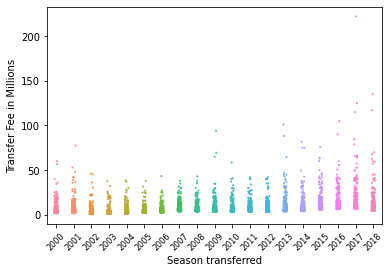

In [23]:
sns.stripplot(x = 'Season_transfered',y='Transfer_fee(millions)',\
              cmap = 'coolwarm',data= soccer,size = 2)
plt.xlabel('Season transferred')
plt.ylabel('Transfer Fee in Millions')
plt.xticks(fontsize = 8,rotation = 45)

### Plotting the relationship between the Transfer fee and the Market value

Text(0.5, 21.706249999999983, 'Market Value in Millions')

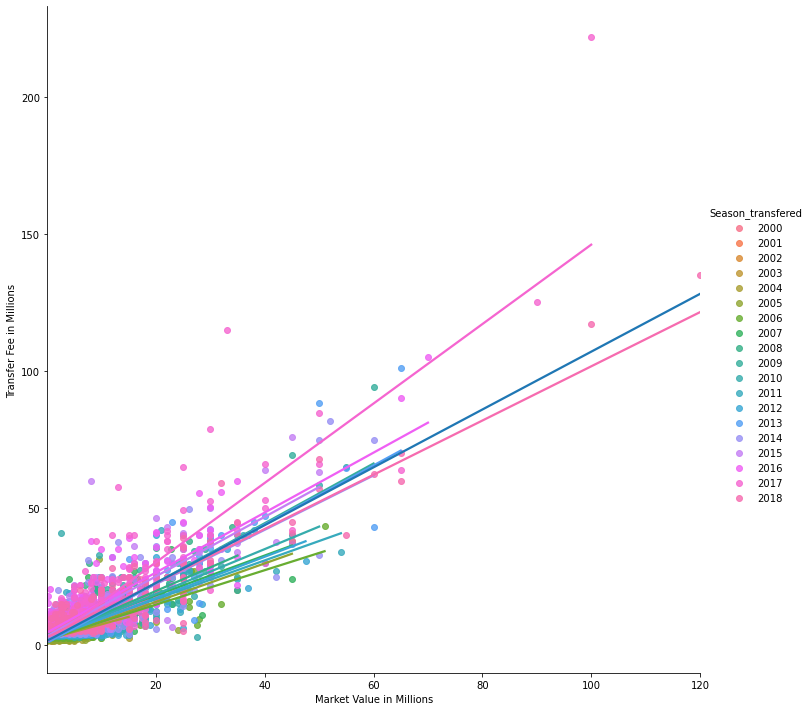

In [24]:
sns.lmplot(x='Market_value(millions)',y='Transfer_fee(millions)',data=soccer, ci = None, hue = 'Season_transfered',height = 10)
sns.regplot(x='Market_value(millions)',y='Transfer_fee(millions)',data=soccer, ci = None, scatter = None, label ='Aggregated transfers')
plt.ylabel('Transfer Fee in Millions')
plt.xlabel('Market Value in Millions')

### Next we have to find the relationship between Ages and Transfer fees

Text(0, 0.5, 'Transfer Fee in Millions')

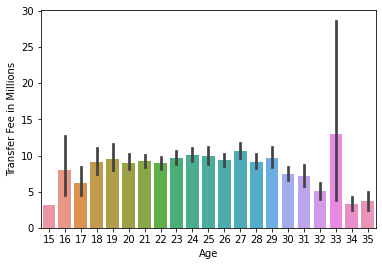

In [25]:
sns.barplot(x='Age',y='Transfer_fee(millions)',data = soccer)
plt.xlabel('Age')
plt.ylabel('Transfer Fee in Millions')

### Determining the  Teams that have spent the most since 2000

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

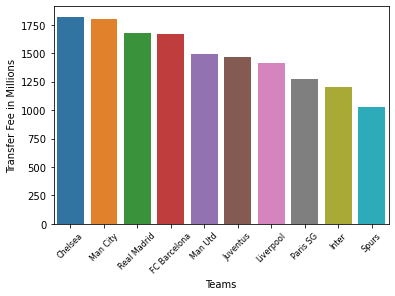

In [27]:
spending =soccer.groupby(by= ['Team_to'])['Transfer_fee(millions)'].sum().sort_values(ascending = False).head(10).reset_index()
sns.barplot(x = 'Team_to', y = 'Transfer_fee(millions)',data = spending)
plt.xlabel('Teams')
plt.ylabel('Transfer Fee in Millions')
plt.xticks(fontsize = 8,rotation = 45)